In [83]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

dataset

In [84]:
X, y = make_blobs(
    n_samples=200, 
    n_features=2,       
    centers=3, 
    cluster_std=0.5,
    random_state=0
)

In [85]:
len(y)

200

plot data

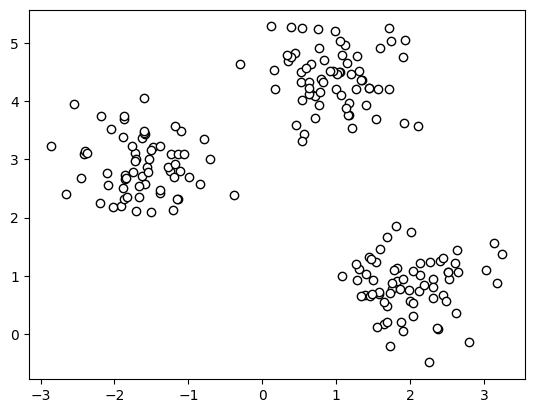

In [86]:
plt.scatter(
   X[:, 0], X[:, 1],
   c='white',
   edgecolor='black'
)

kmeans model

In [87]:
kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=4, 
    tol=1e-04, random_state=2
)

model-training-predict

In [88]:
y_km = kmeans.fit_predict(X)

In [89]:
y_km

array([1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0,
       2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 0])

plot final cluster

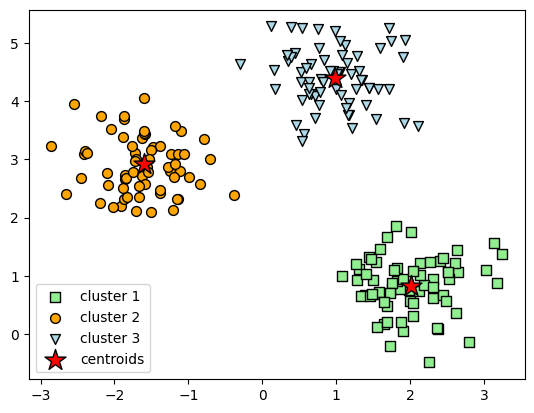

In [90]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

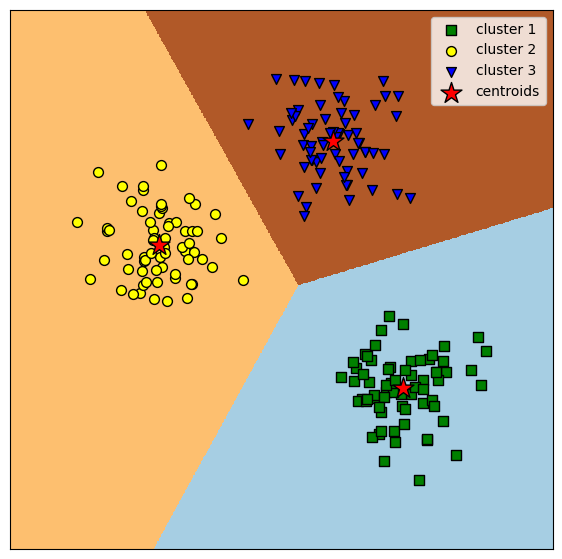

Cluster 0: 67 points
Cluster 1: 66 points
Cluster 2: 67 points
Distances for the first point:
Centroid 0: 4.4309
Centroid 1: 0.4601
Centroid 2: 2.7962


In [93]:
import numpy as np

np.random.seed(42)

kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=8, 
    tol=1e-04, random_state=2
)
kmeans.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
y_km = kmeans.fit_predict(X)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='green',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

# Get the labels of the data points
labels = kmeans.labels_

# Count the number of points in each cluster
counts = np.bincount(labels)

# Display the number of points in each cluster
for i, count in enumerate(counts):
    print(f"Cluster {i}: {count} points")
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Calculate the distance between each point and the centroids
distances = kmeans.transform(X)

# Display the distance between the first point and the centroids
print("Distances for the first point:")
for i, centroid in enumerate(centroids):
    distance = distances[0][i]
    print(f"Centroid {i}: {distance:.4f}")
